In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix


Using TensorFlow backend.


In [3]:
df = pd.read_csv('train.csv')
# df.head(10)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df["Age"].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
#X_train.Age = X.Age.fillna(X_train.Age.mean())
df['Embarked'] = df['Embarked'].fillna('S')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df1 = pd.get_dummies(df[['Embarked','Sex']])

In [11]:
df2 = pd.concat([df1,df], 1)
df2.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,1,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0,0,1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,0,0,1,1,0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,0,0,1,1,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,0,1,0,1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
min_max_scaler = MinMaxScaler(feature_range =(0, 5)) 
df2['Fare'] = min_max_scaler.fit_transform(np.array(df2['Fare']).reshape(-1,1)) 
df2['Age'] = min_max_scaler.fit_transform(np.array(df2['Age']).reshape(-1,1)) 
df2

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,1,0,1,1,0,3,"Braund, Mr. Owen Harris",male,1.355868,1,0,A/5 21171,0.070755,NaN,S
1,1,0,0,1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.361146,1,0,PC 17599,0.695679,C85,C
2,0,0,1,1,0,3,1,3,"Heikkinen, Miss. Laina",female,1.607188,0,0,STON/O2. 3101282,0.077343,NaN,S
3,0,0,1,1,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.172656,1,0,113803,0.518221,C123,S
4,0,0,1,0,1,5,0,3,"Allen, Mr. William Henry",male,2.172656,0,0,373450,0.078563,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,887,0,2,"Montvila, Rev. Juozas",male,1.670018,0,0,211536,0.126872,NaN,S
887,0,0,1,1,0,888,1,1,"Graham, Miss. Margaret Edith",female,1.167379,0,0,112053,0.292781,B42,S
888,0,0,1,1,0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.839603,1,2,W./C. 6607,0.228857,NaN,S
889,1,0,0,0,1,890,1,1,"Behr, Mr. Karl Howell",male,1.607188,0,0,111369,0.292781,C148,C


In [13]:
x = df2[['Embarked_C','Embarked_Q','Embarked_S','Sex_female','Sex_male','Pclass','Age','SibSp','Parch','Fare']]
y = df2['Survived']

In [14]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

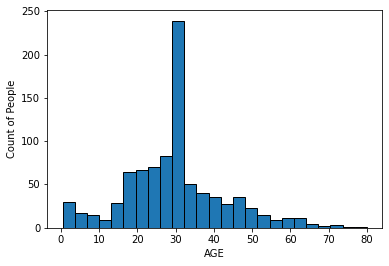

In [15]:
plt.hist(df['Age'], bins=25, ec='black')
plt.xlabel('AGE')
plt.ylabel('Count of People')
plt.show()

In [16]:
x

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,1,3,1.355868,1,0,0.070755
1,1,0,0,1,0,1,2.361146,1,0,0.695679
2,0,0,1,1,0,3,1.607188,0,0,0.077343
3,0,0,1,1,0,1,2.172656,1,0,0.518221
4,0,0,1,0,1,3,2.172656,0,0,0.078563
...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,2,1.670018,0,0,0.126872
887,0,0,1,1,0,1,1.167379,0,0,0.292781
888,0,0,1,1,0,3,1.839603,1,2,0.228857
889,1,0,0,0,1,1,1.607188,0,0,0.292781


In [17]:
x.shape

(891, 10)

In [18]:
y.shape

(891,)

In [19]:
x

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,1,3,1.355868,1,0,0.070755
1,1,0,0,1,0,1,2.361146,1,0,0.695679
2,0,0,1,1,0,3,1.607188,0,0,0.077343
3,0,0,1,1,0,1,2.172656,1,0,0.518221
4,0,0,1,0,1,3,2.172656,0,0,0.078563
...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,2,1.670018,0,0,0.126872
887,0,0,1,1,0,1,1.167379,0,0,0.292781
888,0,0,1,1,0,3,1.839603,1,2,0.228857
889,1,0,0,0,1,1,1.607188,0,0,0.292781


In [20]:
# y = pd.DataFrame(y)
y = pd.DataFrame(y)
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [21]:
x.shape

(891, 10)

In [46]:
y.shape

(891, 1)

In [22]:
model = Sequential([Dense(units=64, activation='relu', input_shape=(10,)),
                   Dense(units=32, activation='relu'),
                    Dense(units=16, activation='relu'),
                   Dense(units=2, activation='softmax')])

In [51]:
model.compile(optimizer=Adam(0.0003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(x=x, y=y, batch_size=10, epochs=40, shuffle=True,  verbose=2,
         validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/40
712/712 - 1s - loss: 0.4013 - accuracy: 0.8343 - val_loss: 0.3483 - val_accuracy: 0.8771
Epoch 2/40
712/712 - 0s - loss: 0.4001 - accuracy: 0.8272 - val_loss: 0.3454 - val_accuracy: 0.8883
Epoch 3/40
712/712 - 0s - loss: 0.4014 - accuracy: 0.8315 - val_loss: 0.3432 - val_accuracy: 0.8939
Epoch 4/40
712/712 - 0s - loss: 0.3959 - accuracy: 0.8329 - val_loss: 0.3493 - val_accuracy: 0.8771
Epoch 5/40
712/712 - 0s - loss: 0.3975 - accuracy: 0.8343 - val_loss: 0.3502 - val_accuracy: 0.8771
Epoch 6/40
712/712 - 0s - loss: 0.3971 - accuracy: 0.8343 - val_loss: 0.3423 - val_accuracy: 0.8603
Epoch 7/40
712/712 - 0s - loss: 0.3979 - accuracy: 0.8272 - val_loss: 0.3418 - val_accuracy: 0.8827
Epoch 8/40
712/712 - 0s - loss: 0.3963 - accuracy: 0.8315 - val_loss: 0.3457 - val_accuracy: 0.8883
Epoch 9/40
712/712 - 0s - loss: 0.3937 - accuracy: 0.8385 - val_loss: 0.3397 - val_accuracy: 0.8771
Epoch 10/40
712/712 - 0s - loss: 0.3937 - accuracy: 0.

In [25]:
reg = LogisticRegression()

reg.fit(x, y)

# y_pred = reg.predict(x_test)

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
reg.score(x, y)

0.8013468013468014

In [27]:
# reg.score(x_test, y_test)

## Test

In [28]:
dft = pd.read_csv('test.csv')
dft.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [29]:
dft.shape

(418, 11)

In [30]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:



dft.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


In [32]:
dft["Age"].sort_values().unique()

array([ 0.17,  0.33,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  5.  ,
        6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.5 , 12.  , 13.  , 14.  ,
       14.5 , 15.  , 16.  , 17.  , 18.  , 18.5 , 19.  , 20.  , 21.  ,
       22.  , 22.5 , 23.  , 24.  , 25.  , 26.  , 26.5 , 27.  , 28.  ,
       28.5 , 29.  , 30.  , 31.  , 32.  , 32.5 , 33.  , 34.  , 34.5 ,
       35.  , 36.  , 36.5 , 37.  , 38.  , 38.5 , 39.  , 40.  , 40.5 ,
       41.  , 42.  , 43.  , 44.  , 45.  , 46.  , 47.  , 48.  , 49.  ,
       50.  , 51.  , 53.  , 54.  , 55.  , 57.  , 58.  , 59.  , 60.  ,
       60.5 , 61.  , 62.  , 63.  , 64.  , 67.  , 76.  ,   nan])

In [33]:
dft['Age'] = dft['Age'].fillna(dft['Age'].mean())
#X_train.Age = X.Age.fillna(X_train.Age.mean())
dft['Embarked'] = dft['Embarked'].fillna('S')

In [34]:
dft1 = pd.get_dummies(dft[['Embarked','Sex']])

In [35]:
dft2 = pd.concat([dft1,dft], 1)
dft2.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,0,1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,0,0,1,1,0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,1,0,0,1,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,0,1,0,1,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,0,0,1,1,0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
min_max_scaler = MinMaxScaler(feature_range =(0, 5)) 
dft2['Fare'] = min_max_scaler.fit_transform(np.array(dft2['Fare']).reshape(-1,1)) 
dft2['Age'] = min_max_scaler.fit_transform(np.array(dft2['Age']).reshape(-1,1)) 
dft2

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,0,1,892,3,"Kelly, Mr. James",male,2.263616,0,0,330911,0.076408,NaN,Q
1,0,0,1,1,0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.087828,1,0,363272,0.068315,NaN,S
2,0,1,0,0,1,894,2,"Myles, Mr. Thomas Francis",male,4.076883,0,0,240276,0.094544,NaN,Q
3,0,0,1,0,1,895,3,"Wirz, Mr. Albert",male,1.769089,0,0,315154,0.084540,NaN,S
4,0,0,1,1,0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.439404,1,1,3101298,0.119918,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,1,0,1,1305,3,"Spector, Mr. Woolf",male,1.984873,0,0,A.5. 3236,0.078563,NaN,S
414,1,0,0,1,0,1306,1,"Oliva y Ocana, Dona. Fermina",female,2.560332,0,0,PC 17758,1.062793,C105,C
415,0,0,1,0,1,1307,3,"Saether, Mr. Simon Sivertsen",male,2.527364,0,0,SOTON/O.Q. 3101262,0.070755,NaN,S
416,0,0,1,0,1,1308,3,"Ware, Mr. Frederick",male,1.984873,0,0,359309,0.078563,NaN,S


In [37]:
xt = dft2[['Embarked_C','Embarked_Q','Embarked_S','Sex_female','Sex_male','Pclass','Age','SibSp','Parch','Fare']]
# y = dft2['Survived']

In [38]:
# y_pred = reg.predict(xt)

In [39]:
xt.describe()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,0.244019,0.110048,0.645933,0.363636,0.636364,2.265550,1.984873,0.447368,0.392344,0.347698
std,0.430019,0.313324,0.478803,0.481622,0.481622,0.841838,0.833083,0.896760,0.981429,0.545622
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.505341,0.000000,0.000000,0.077058
50%,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.984873,0.000000,0.000000,0.141064
75%,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.346037,1.000000,0.000000,0.307420
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,8.000000,9.000000,5.000000


In [40]:
xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Embarked_C  418 non-null    uint8  
 1   Embarked_Q  418 non-null    uint8  
 2   Embarked_S  418 non-null    uint8  
 3   Sex_female  418 non-null    uint8  
 4   Sex_male    418 non-null    uint8  
 5   Pclass      418 non-null    int64  
 6   Age         418 non-null    float64
 7   SibSp       418 non-null    int64  
 8   Parch       418 non-null    int64  
 9   Fare        417 non-null    float64
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [41]:
# dft.info

In [42]:
xt['Fare'] = xt['Fare'].fillna(xt['Fare'].mean())

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
# y_test = pd.read_csv('gender_submission.csv')
# y_teast

In [44]:
y_pred = reg.predict(xt)

In [45]:
y_test = y_test['PassengerId']
y_test = pd.DataFrame(y_test)
y_test

NameError: name 'y_test' is not defined

In [ ]:
# y_test = y_test['Survived']

In [ ]:
y_pred = pd.DataFrame(y_pred)
# y_pred[0] = 'Answer'
y_pred

In [ ]:
# y_test

In [ ]:
# reg.score(xt, y_test)

In [ ]:
# y_pred = reg.predict(xt)

In [ ]:
# from sklearn.metrics import mean_absolute_error
# y_pred = reg.predict(xt)

In [ ]:
# mean_absolute_error(y_test, y_pred)

In [ ]:
# reg.score(xt, y_pred)

In [ ]:
# xt

In [ ]:
# reg.predict(np.array(['0','1','0','0','1','3','2.263616','0','0','0.076408']).reshape(-1,1))

In [ ]:
# y_final = pd.concat([y_test, y_pred], 1)

In [ ]:
# y_final

In [ ]:

# y_final.set_index('PassengerId', inplace = True)

In [ ]:
# y_final

In [ ]:
# y_final.to_csv('final_solution.csv', encoding='utf-8')

In [ ]:
# xt

In [ ]:
# plt.plot(xt['Age'])
# plt.legend()
# plt.show()

In [ ]:
xt.shape

In [ ]:
model.fit(x=x, y=None, batch_size=10, epochs=40, shuffle=True,  verbose=2,
         validation_split=0.2)

In [ ]:
predictions = model.predict(x=xt, batch_size=10, verbose=0)

In [ ]:
predictions

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

In [ ]:
# cm = confusion_matrix(y_true=, y_pred=rounded_predictions)
# cm

In [ ]:
rounded_predictions = rounded_predictions.reshape(-1, 1)

In [ ]:
rounded_predictions.shape

In [ ]:
rounded_predictions = pd.DataFrame(rounded_predictions)

In [ ]:
rounded_predictions

In [ ]:
titanic_3 = rounded_predictions.to_csv('titanic_using_DL_5.csv')